# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("/content/emp_automovel.csv")

In [3]:
x = dados.drop("inadimplente", axis =1)
y = dados["inadimplente"]

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [6]:
print(f"Acurácia: {modelo.score(x, y)}")

Acurácia: 1.0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [9]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f"Acurácia de treino: {modelo.score(x_treino, y_treino)}")
print(f"Acurácia de validação:{modelo.score(x_val, y_val)}")

Acurácia de treino: 1.0
Acurácia de validação:0.8483581569549691


In [10]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f"Acurácia de treino: {modelo.score(x_treino, y_treino)}")
print(f"Acurácia de validação:{modelo.score(x_val, y_val)}")

Acurácia de treino: 0.9205574912891986
Acurácia de validação:0.9055831373573731


In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10355   124]
 [  960    42]]


In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

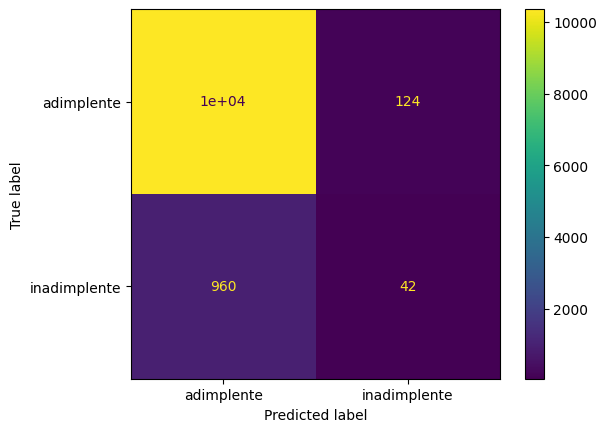

In [14]:
vizualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ["adimplente", "inadimplente"])
vizualizacao.plot();

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9055831373573731


In [17]:
from sklearn.metrics import precision_score, recall_score

In [18]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.25301204819277107
Recall: 0.041916167664670656


In [19]:
from sklearn.metrics import f1_score

In [20]:
print(f'F1-Score: {f1_score(y_val, y_previsto)}')

F1-Score: 0.07191780821917808


Curva ROC


In [21]:
from sklearn.metrics import RocCurveDisplay

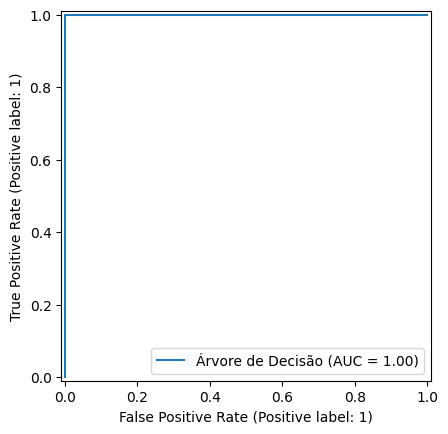

In [22]:
RocCurveDisplay.from_predictions(y_val, y_val, name = "Árvore de Decisão");

In [23]:
from sklearn.metrics import roc_auc_score

In [24]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5150414887373835


Curva de precisão x recall

In [25]:
from sklearn.metrics import PrecisionRecallDisplay

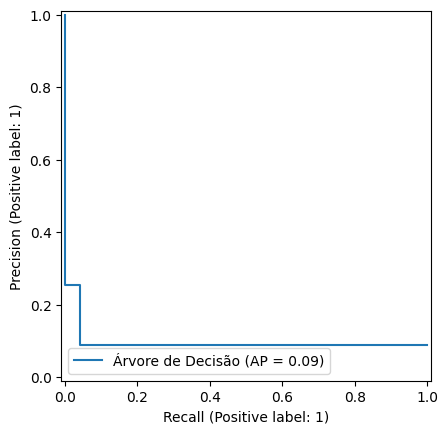

In [26]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = "Árvore de Decisão");

In [27]:
from sklearn.metrics import average_precision_score

In [28]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09422170515363755


In [29]:
from sklearn.metrics import classification_report

Relatório de métricas

In [30]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



Kfold

In [31]:
from sklearn.model_selection import cross_validate, KFold

In [32]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultado = cross_validate(modelo, x, y, cv = kf)
cv_resultado

{'fit_time': array([0.53285766, 0.67848635, 0.48584247, 0.70865345, 0.43242621]),
 'score_time': array([0.00810456, 0.01239252, 0.0122745 , 0.00907159, 0.00528002]),
 'test_score': array([0.91322809, 0.90820993, 0.90733885, 0.91332753, 0.89949913])}

Validação cruzada com recall

In [33]:
def intervalo_conf(resultados):
    media = resultados["test_score"].mean()
    desvio_padrao = resultados["test_score"].std()
    print(f"Intervalo de Confiança: [{media * 2 - desvio_padrao}, {min(media + 2 * desvio_padrao, 1)}]")

In [34]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultado = cross_validate(modelo, x, y, cv = kf, scoring = "recall")
cv_resultado

{'fit_time': array([0.39777589, 0.43894649, 0.4459753 , 0.26659489, 0.23628497]),
 'score_time': array([0.00943804, 0.00866795, 0.00915408, 0.00634313, 0.00609326]),
 'test_score': array([0.02509908, 0.02351485, 0.0196802 , 0.01305483, 0.02427746])}

In [35]:
intervalo_conf(cv_resultado)

Intervalo de Confiança: [0.03780854343817145, 0.030009323642604634]


Estratificando os  dados

In [36]:
dados["inadimplente"].value_counts(normalize = True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [37]:
from sklearn.model_selection import StratifiedKFold

In [38]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf,scoring = "recall")
cv_resultados

{'fit_time': array([0.25021076, 0.25372839, 0.23337889, 0.22722316, 0.24357772]),
 'score_time': array([0.00683618, 0.0057776 , 0.00565934, 0.00555468, 0.00583553]),
 'test_score': array([0.03865337, 0.02621723, 0.02992519, 0.02493766, 0.02493766])}

In [39]:
intervalo_conf(cv_resultados)


Intervalo de Confiança: [0.052676695638927476, 0.03931770252322289]


Oversamplig

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [42]:
y_balanceado.value_counts(normalize = True)

,proportion
inadimplente,
0,0.5
1,0.5


In [43]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv = skf,scoring = "recall")
cv_resultados


{'fit_time': array([0.52849174, 0.52686644, 0.51732254, 0.51984167, 0.67298317]),
 'score_time': array([0.01130891, 0.00721264, 0.00749469, 0.00739312, 0.0112431 ]),
 'test_score': array([0.74170842, 0.72906228, 0.7323154 , 0.76380771, 0.73228346])}

In [44]:
intervalo_conf(cv_resultados)

Intervalo de Confiança: [1.4669601094884681, 0.765257050993681]


Pipeline para validação

In [45]:
from imblearn.pipeline import Pipeline as imbpipeline

In [46]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline(steps = [("oversample", SMOTE()), ("arvore", modelo)])

In [47]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf,scoring = "recall")

In [48]:
intervalo_conf(cv_resultados)

Intervalo de Confiança: [0.49953035184045225, 0.3254837404522085]


Undersampling

In [49]:
from imblearn.under_sampling import NearMiss

In [50]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline(steps = [("undersample", NearMiss(version = 3)), ("arvore", modelo)])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf,scoring = "recall")

In [51]:
intervalo_conf(cv_resultados)

Intervalo de Confiança: [1.3085253767710932, 0.7004451446648556]


Testando o modelo

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.12      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



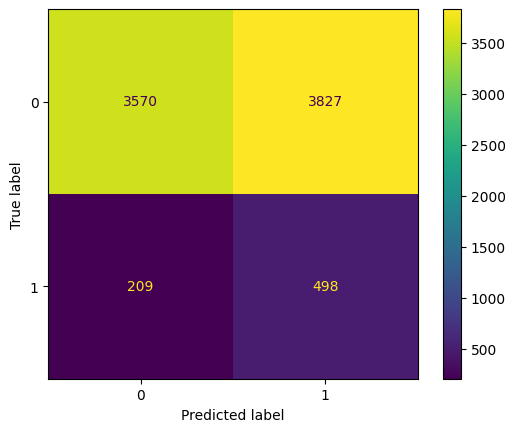

In [52]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);